In [26]:
import numpy as np
from scipy.stats import spearmanr
import os
import json
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
ticks = ['correctness', 'data coverage', 'relevance', 'fluency', 'text structure', 
         'bert precision', 'bert recall', 'bert F1', 'bleurt', 'bleu', 'ter', 'questeval', 'questeval_vanilla',
         'all_bs160_allneg', 'all_bs192_hardneg', 'cross_all_bs160_allneg', 
         'finetuned_cross_all_bs160_allneg', 'finetuned_cross_all_bs192_hardneg',
         'finetuned_cross_all_bs320_vanilla', 'finetuned_cross_all-mpnet-base-v2', 
         'finetuned_bi_all_bs160_allneg', 'finetuned_bi_all_bs192_hardneg',
         'finetuned_bi_all_bs320_vanilla', 'finetuned_bi_all-mpnet-base-v2',
        'ensemble']

In [28]:
data = json.load(open("2020_scores.json"))
# data["ter"] = [-item for item in data["ter"]]
data["ensemble"] = [(item[0] + item[1]) / 2 
                    for item in zip(data["finetuned_cross_all_bs160_allneg"], data["finetuned_bi_all_bs160_allneg"])]

In [29]:
data.keys()

dict_keys(['correctness', 'data coverage', 'relevance', 'fluency', 'text structure', 'bert precision', 'bert recall', 'bert F1', 'bleurt', 'bleu', 'ter', 'all_bs160_allneg', 'all_bs192_hardneg', 'cross_all_bs160_allneg', 'finetuned_cross_all_bs192_hardneg', 'finetuned_cross_all_bs160_allneg', 'finetuned_cross_all_bs320_vanilla', 'finetuned_cross_all-mpnet-base-v2', 'finetuned_bi_all_bs192_hardneg', 'finetuned_bi_all_bs160_allneg', 'finetuned_bi_all_bs320_vanilla', 'finetuned_bi_all-mpnet-base-v2', 'questeval', 'questeval_vanilla', 'rdf', 'text', 'ensemble'])

(16, 16)


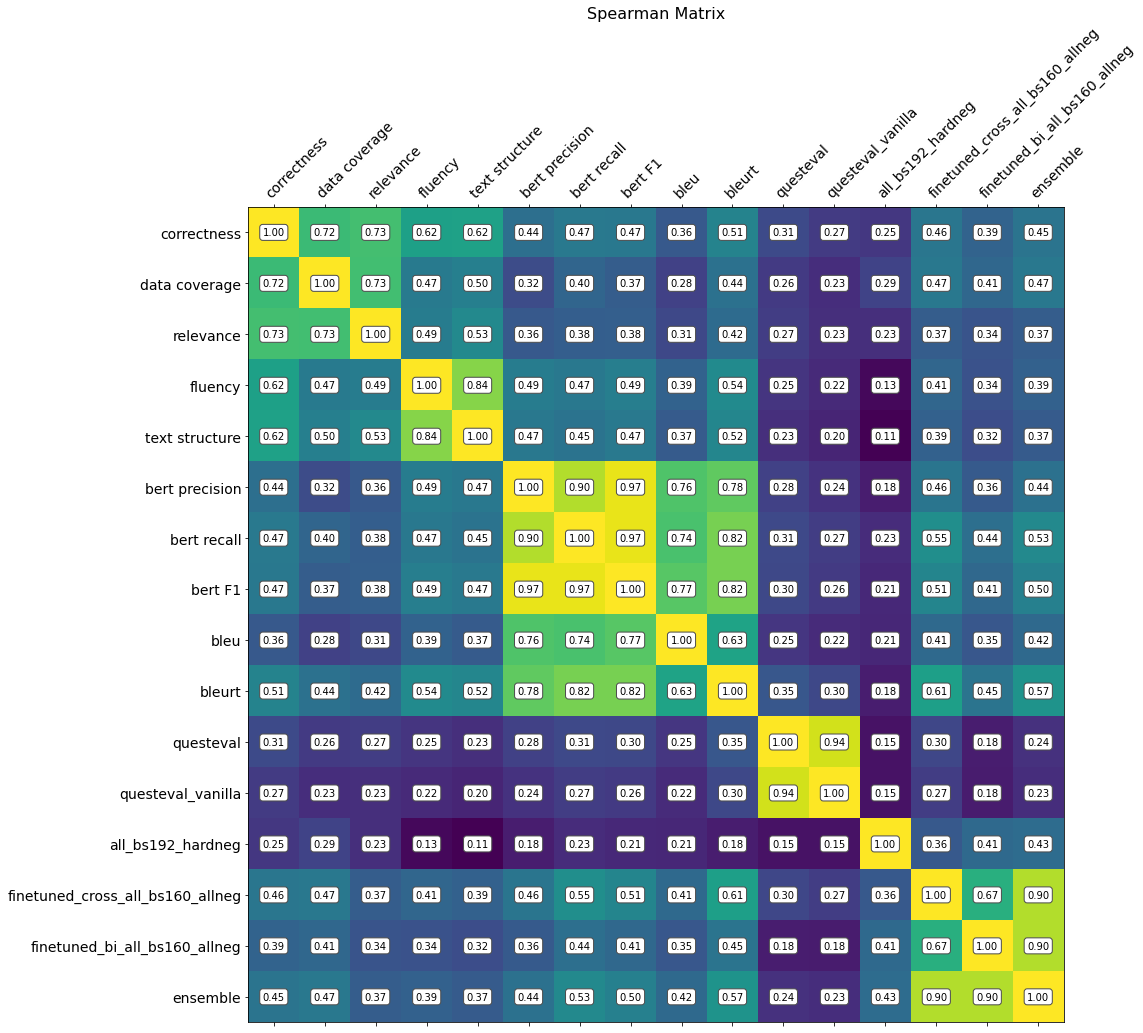

In [30]:
ticks = ['correctness', 'data coverage', 'relevance', 'fluency', 'text structure', 
         'bert precision', 'bert recall', 'bert F1', 'bleu', 'bleurt', 'questeval', 'questeval_vanilla',
         'all_bs192_hardneg',
         'finetuned_cross_all_bs160_allneg',
         'finetuned_bi_all_bs160_allneg',
        'ensemble']

correlations = spearmanr(np.stack([data[tick] for tick in ticks]), axis=1)[0]
print(correlations.shape)
f = plt.figure(figsize=(19, 15))
ax = plt.axes()
ax.matshow(correlations)
for (i, j), z in np.ndenumerate(correlations):
    ax.text(j, i, '{:0.2f}'.format(z), ha='center', va='center',
            bbox=dict(boxstyle='round', facecolor='white', edgecolor='0.3'))
plt.xticks(range(len(ticks)), ticks, fontsize=14, rotation=45, ha='left', rotation_mode='anchor')
plt.yticks(range(len(ticks)), ticks, fontsize=14)
# cb = plt.colorbar()
# cb.ax.tick_params(labelsize=14)
plt.title('Spearman Matrix', fontsize=16);

(16, 16)


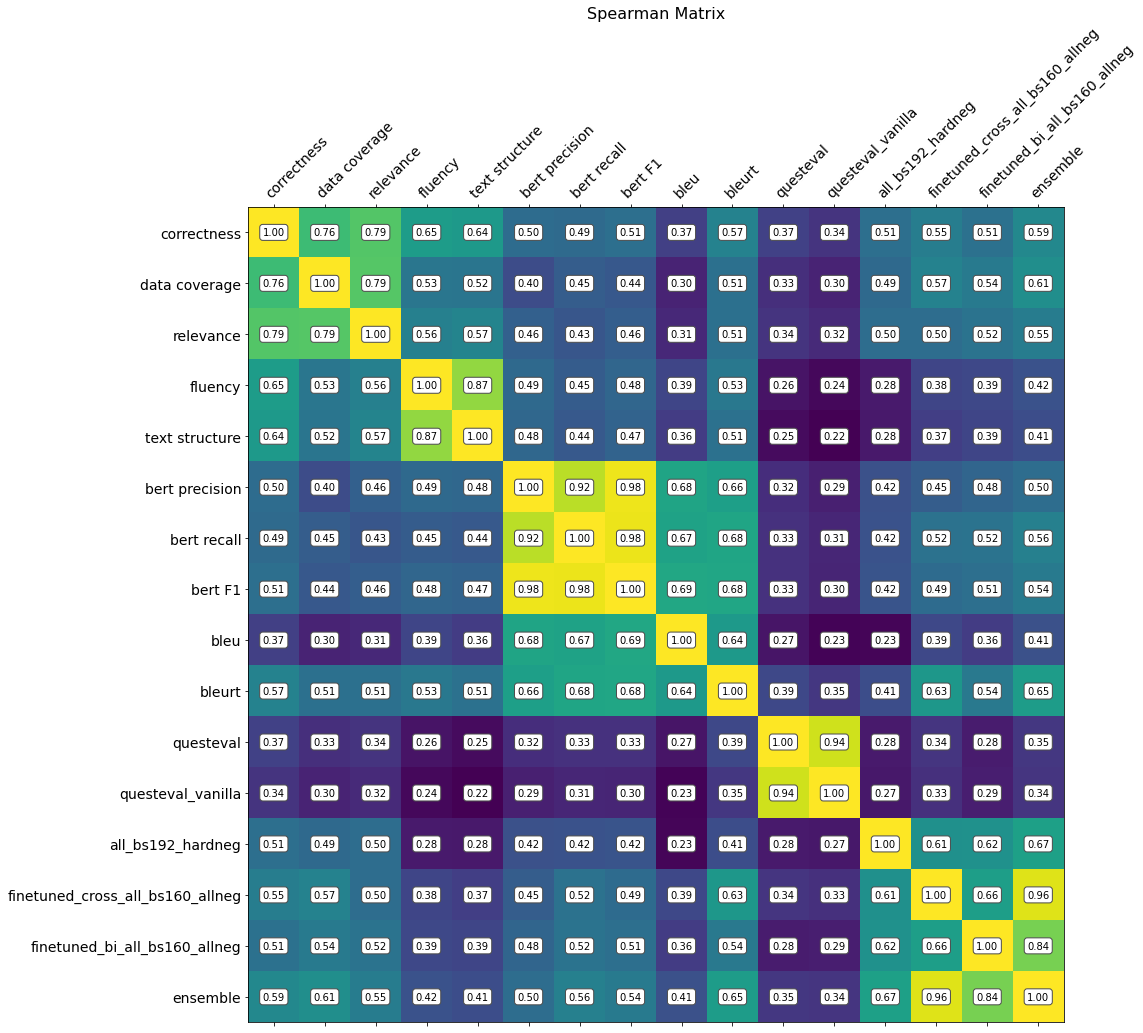

In [31]:
ticks = ['correctness', 'data coverage', 'relevance', 'fluency', 'text structure', 
         'bert precision', 'bert recall', 'bert F1', 'bleu', 'bleurt', 'questeval', 'questeval_vanilla',
         'all_bs192_hardneg',
         'finetuned_cross_all_bs160_allneg',
         'finetuned_bi_all_bs160_allneg',
        'ensemble']

correlations = np.corrcoef(np.stack([data[tick] for tick in ticks]))
print(correlations.shape)
f = plt.figure(figsize=(19, 15))
ax = plt.axes()
ax.matshow(correlations)
for (i, j), z in np.ndenumerate(correlations):
    ax.text(j, i, '{:0.2f}'.format(z), ha='center', va='center',
            bbox=dict(boxstyle='round', facecolor='white', edgecolor='0.3'))
plt.xticks(range(len(ticks)), ticks, fontsize=14, rotation=45, ha='left', rotation_mode='anchor')
plt.yticks(range(len(ticks)), ticks, fontsize=14)
# cb = plt.colorbar()
# cb.ax.tick_params(labelsize=14)
plt.title('Pearson Matrix', fontsize=16);

(16, 16)


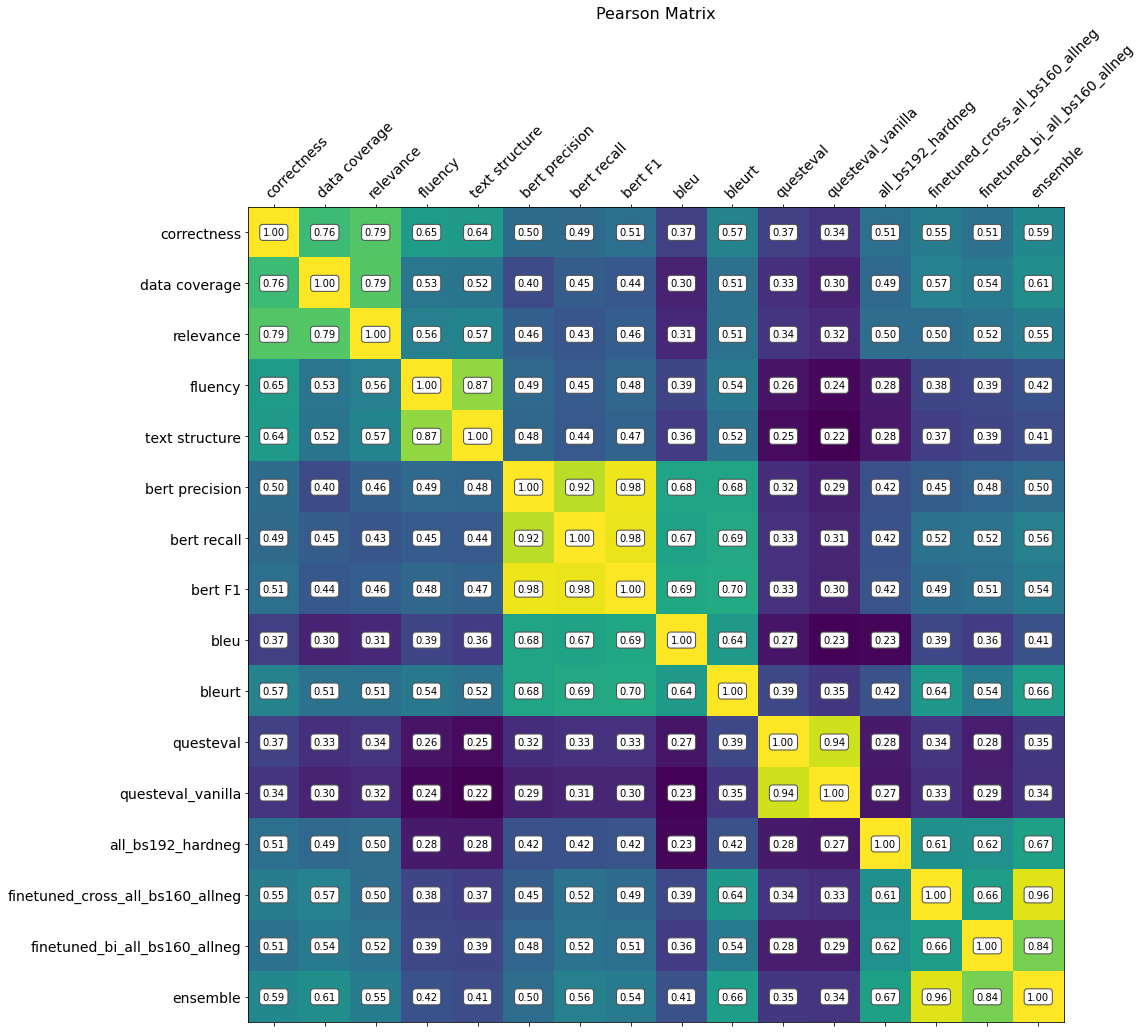

In [32]:
ticks = ['correctness', 'data coverage', 'relevance', 'fluency', 'text structure', 
         'bert precision', 'bert recall', 'bert F1', 'bleu', 'bleurt', 'questeval', 'questeval_vanilla',
         'all_bs192_hardneg',
         'finetuned_cross_all_bs160_allneg',
         'finetuned_bi_all_bs160_allneg',
        'ensemble']

data["bleurt"] = [min(1, item) for item in data["bleurt"]]

correlations = np.corrcoef(np.stack([data[tick] for tick in ticks]))
print(correlations.shape)
f = plt.figure(figsize=(19, 15))
ax = plt.axes()
ax.matshow(correlations)
for (i, j), z in np.ndenumerate(correlations):
    ax.text(j, i, '{:0.2f}'.format(z), ha='center', va='center',
            bbox=dict(boxstyle='round', facecolor='white', edgecolor='0.3'))
plt.xticks(range(len(ticks)), ticks, fontsize=14, rotation=45, ha='left', rotation_mode='anchor')
plt.yticks(range(len(ticks)), ticks, fontsize=14)
# cb = plt.colorbar()
# cb.ax.tick_params(labelsize=14)
plt.title('Pearson Matrix', fontsize=16);

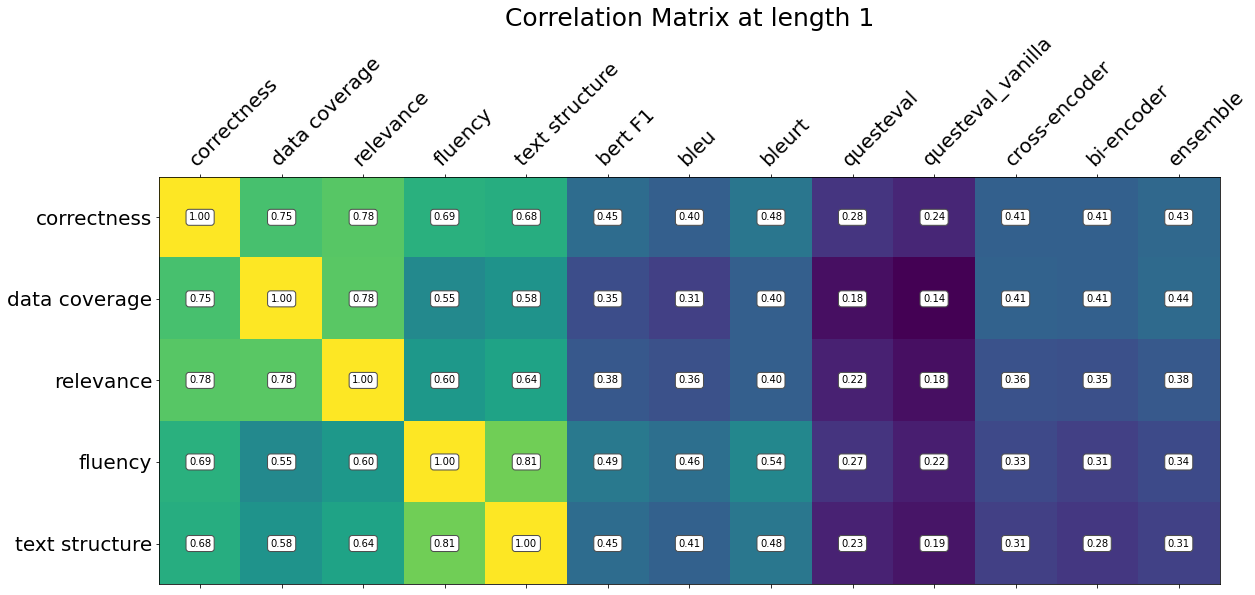

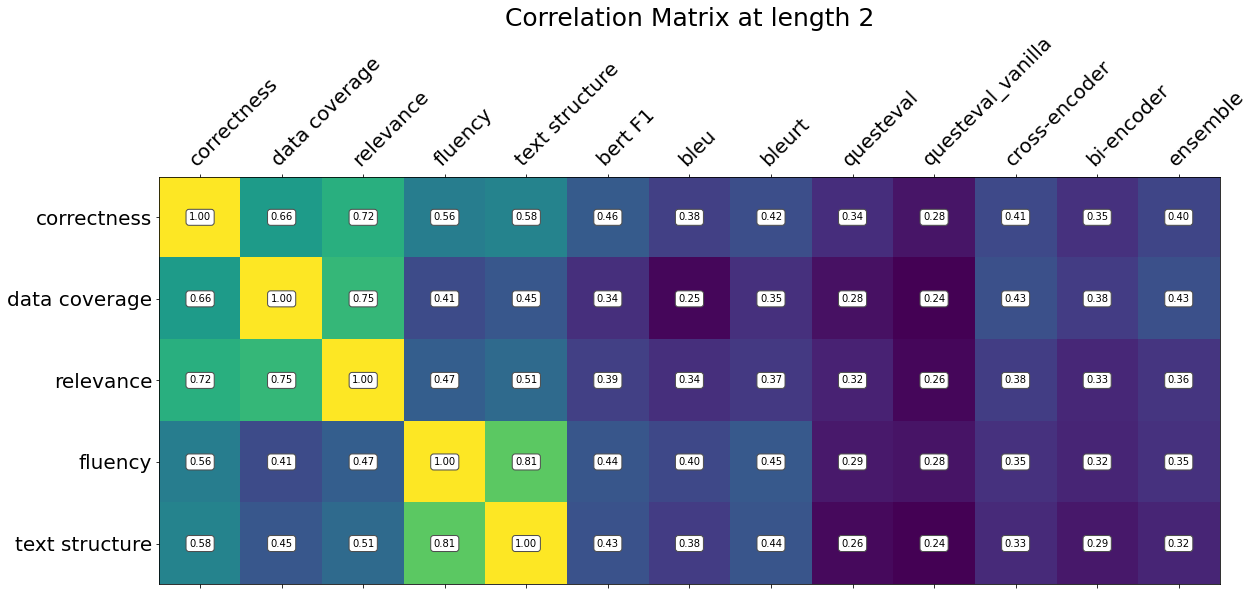

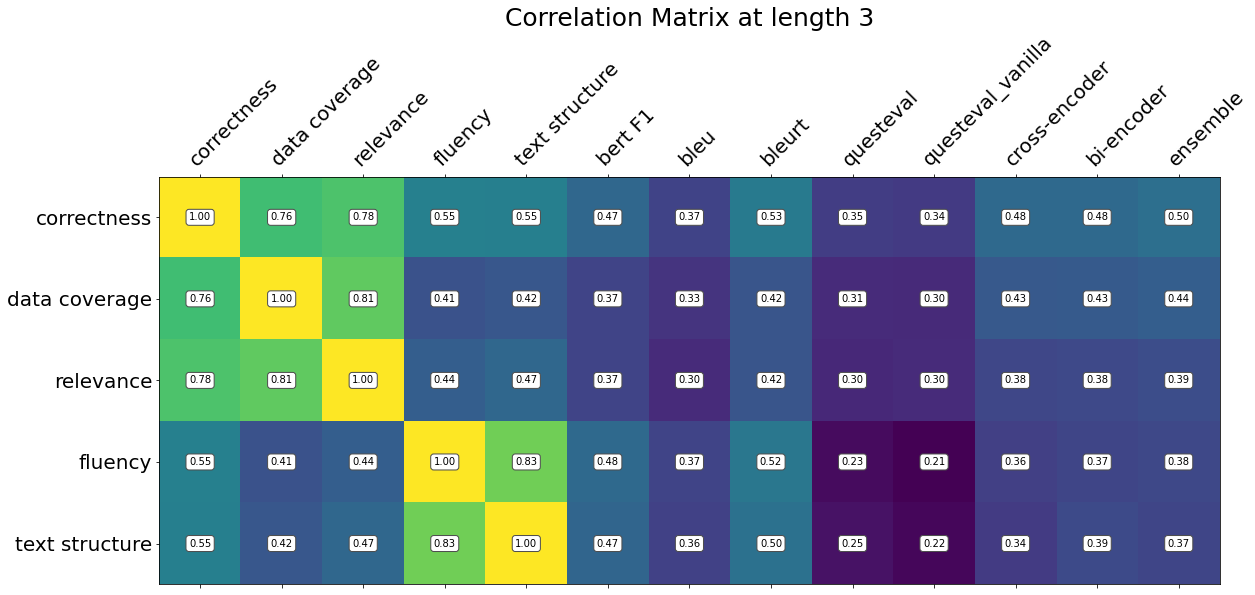

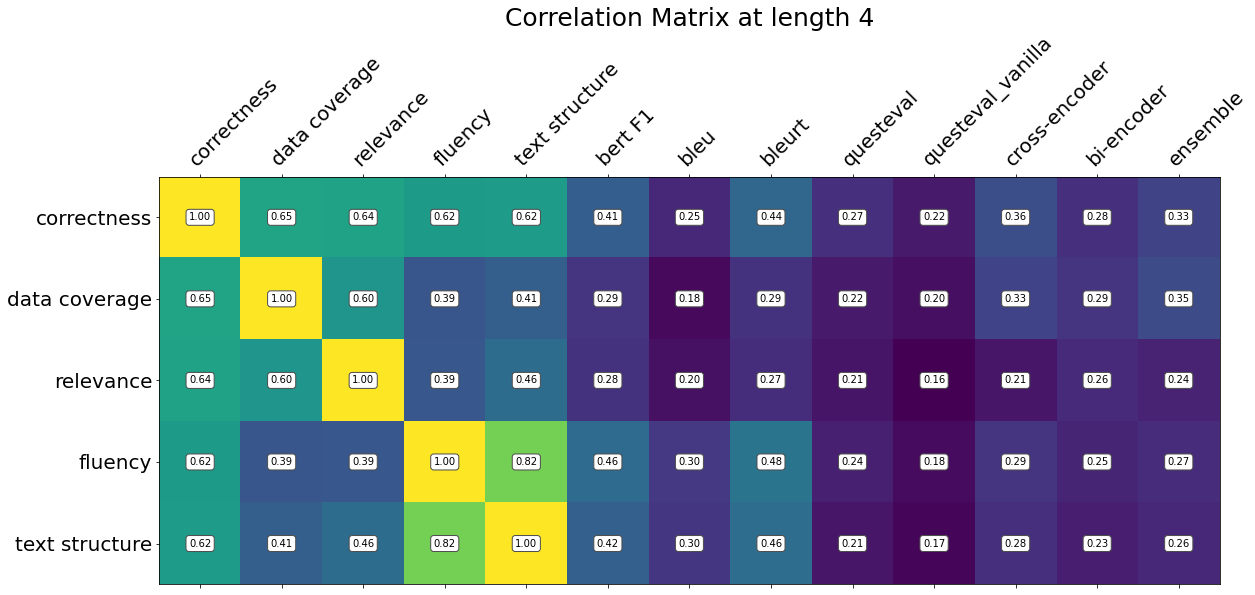

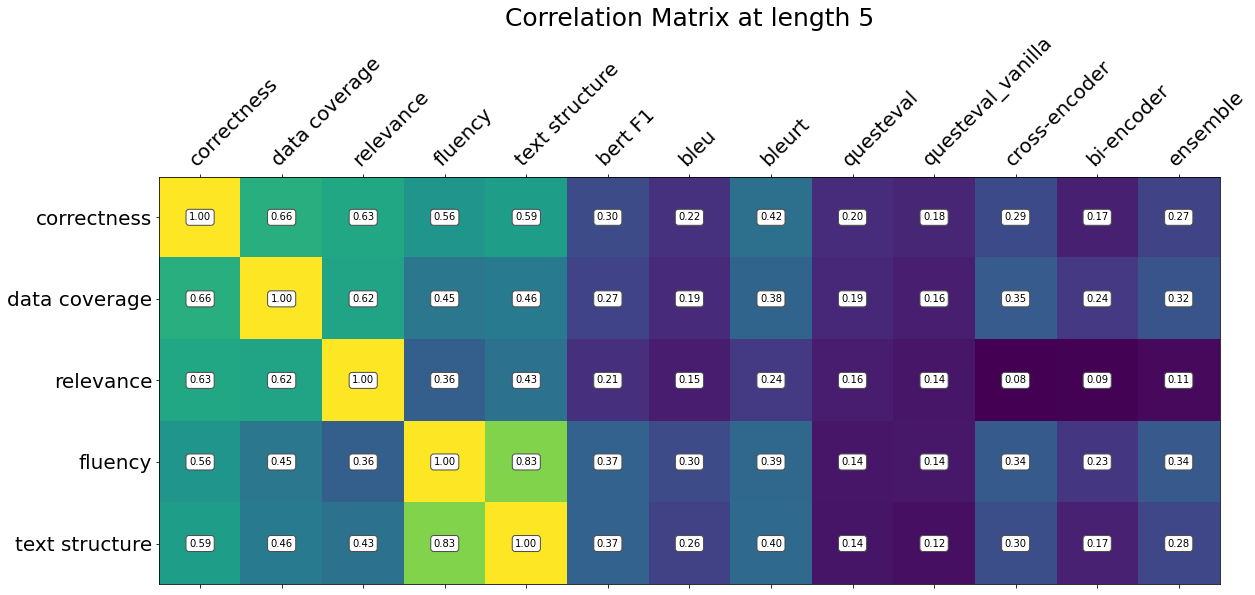

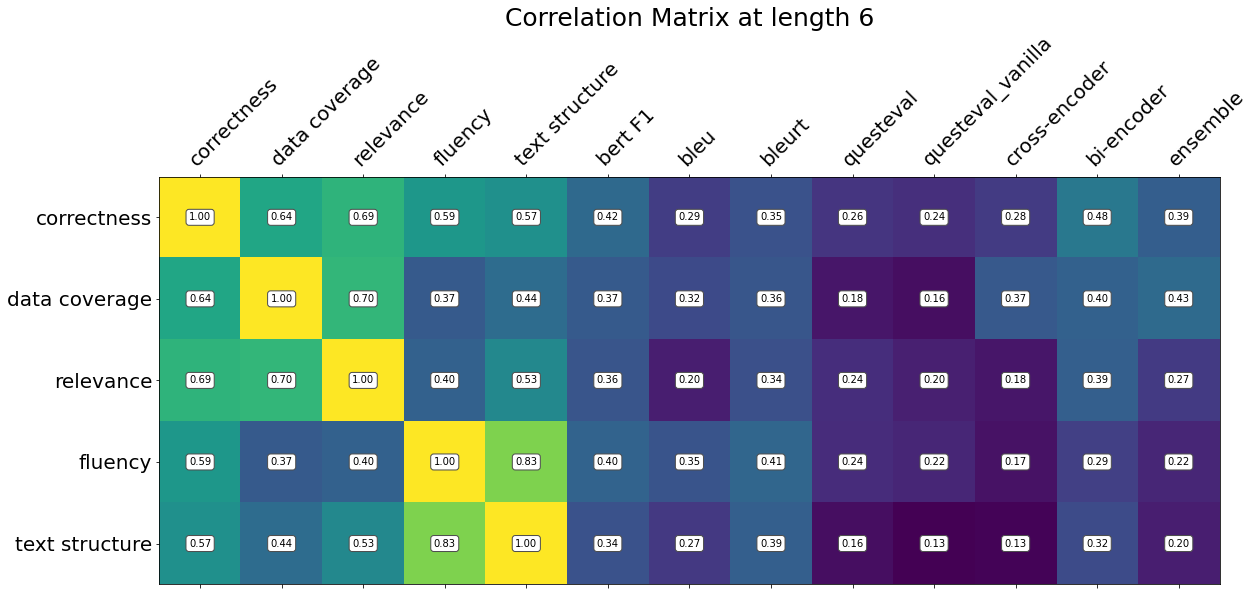

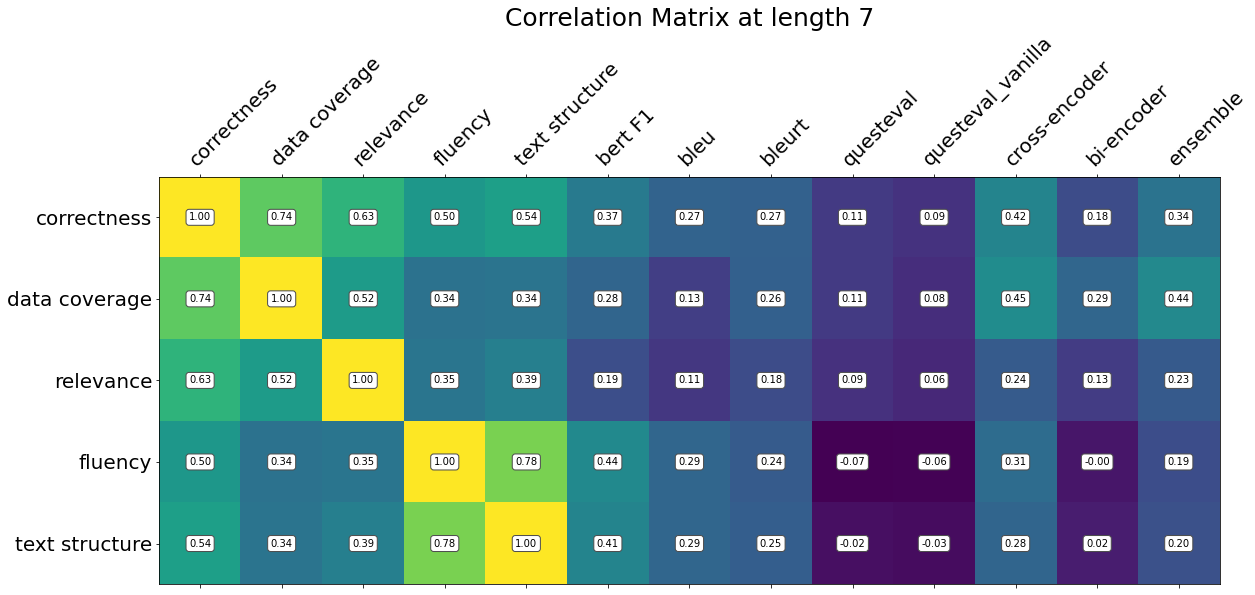

In [22]:
lengths = {len(rdf.split("[O]")) - 1 for rdf in data["rdf"]}

for length in lengths:
    ticks = ['correctness', 'data coverage', 'relevance', 'fluency', 'text structure', 'bert F1', 'bleu', 'bleurt', 'questeval', 'questeval_vanilla',
             'finetuned_cross_all_bs160_allneg',
             'finetuned_bi_all_bs160_allneg',
            'ensemble']
    stacked = np.stack([data[tick] for tick in ticks])
    good_indices = [i for i, rdf in enumerate(data["rdf"]) if len(rdf.split("[O]")) == length + 1]
    stacked = stacked[:, good_indices]    
    
    correlations = spearmanr(stacked, axis=1)[0]
    f = plt.figure(figsize=(19, 15))
    ax = plt.axes()
    ax.matshow(correlations[:5, :])
    for (i, j), z in np.ndenumerate(correlations):
        if i > 4:
            continue
        ax.text(j, i, '{:0.2f}'.format(z), ha='center', va='center',
                bbox=dict(boxstyle='round', facecolor='white', edgecolor='0.3'))

    ticks = ['correctness', 'data coverage', 'relevance', 'fluency', 'text structure', 'bert F1', 'bleu', 'bleurt', 'questeval', 'questeval_vanilla',  
             'cross-encoder',
             'bi-encoder', 'ensemble']

    plt.xticks(range(len(ticks)), ticks, fontsize=20, rotation=45, ha='left', rotation_mode='anchor')
    plt.yticks(range(5), ticks[:5], fontsize=20)
    # cb = plt.colorbar()
    # cb.ax.tick_params(labelsize=14)
    plt.title(f'Correlation Matrix at length {length}', fontsize=25);

In [ ]:
lengths = {len(rdf.split("[O]")) - 1 for rdf in data["rdf"]}

ensemble_correlations = []
bleurt_correlations = []

for length in lengths:
    print(length)
    ticks = ['correctness', 'data coverage', 'relevance', 'fluency', 'text structure', 'bert F1', 'bleu', 'bleurt',
             'finetuned_cross_all_bs160_allneg',
             'finetuned_bi_all_bs160_allneg',
            'ensemble']
    ticks = {tick: i for i, tick in enumerate(ticks)}
    stacked = np.stack([data[tick] for tick in ticks])
    good_indices = [i for i, rdf in enumerate(data["rdf"]) if len(rdf.split("[O]")) == length + 1]
    stacked = stacked[:, good_indices]    
    
    correlations = np.corrcoef(stacked)
    correctness_only = correlations[0]
    
    ensemble_correlations.append(correctness_only[ticks["ensemble"]])
    bleurt_correlations.append(correctness_only[ticks["bleurt"]])
    
ax = plt.gca()
ax.plot(sorted(lengths), ensemble_correlations, label="ours")
ax.plot(sorted(lengths), bleurt_correlations, label="BLEURT")
ax.set_ylabel("Correlation with correctness")
ax.set_xlabel("RDF length")
ax.legend()

In [ ]:
ticks = ['correctness', 'data coverage', 'relevance', 'fluency', 'text structure', 'bert F1', 'bleu', 'bleurt', 'questeval', 'questeval_vanilla',
         'finetuned_cross_all_bs160_allneg',
         'finetuned_bi_all_bs160_allneg',
        'ensemble']

correlations = np.corrcoef(np.stack([data[tick] for tick in ticks]))
f = plt.figure(figsize=(19, 15))
ax = plt.axes()
ax.matshow(correlations[:5, :])
for (i, j), z in np.ndenumerate(correlations):
    if i > 4:
        continue
    ax.text(j, i, '{:0.2f}'.format(z), ha='center', va='center', fontsize=20,
            bbox=dict(boxstyle='round', facecolor='white', edgecolor='0.3'))
    
ticks = ['correctness', 'data coverage', 'relevance', 'fluency', 'text structure', 'bert F1', 'bleu', 'bleurt', 'questeval_data2text', 'questeval_vanilla',  
         'cross-encoder',
         'bi-encoder', 'ensemble']
    
plt.xticks(range(len(ticks)), ticks, fontsize=20, rotation=45, ha='left', rotation_mode='anchor')
plt.yticks(range(5), ticks[:5], fontsize=20)
# cb = plt.colorbar()
# cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=25);

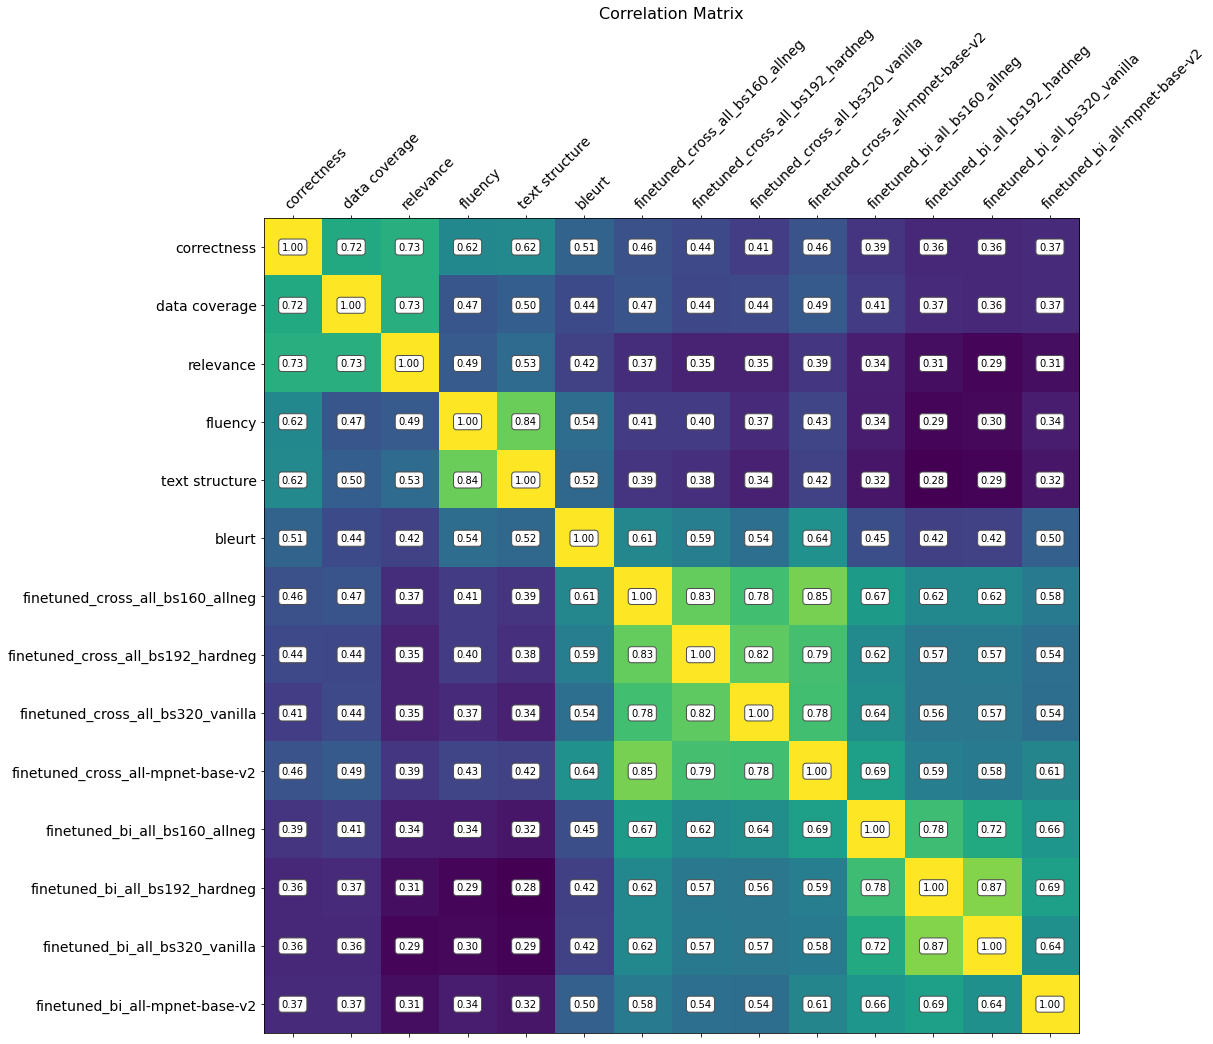

In [11]:
ticks = ['correctness', 'data coverage', 'relevance', 'fluency', 'text structure', 'bleurt',
         'finetuned_cross_all_bs160_allneg', 'finetuned_cross_all_bs192_hardneg',
         'finetuned_cross_all_bs320_vanilla', 'finetuned_cross_all-mpnet-base-v2', 
         'finetuned_bi_all_bs160_allneg', 'finetuned_bi_all_bs192_hardneg',
         'finetuned_bi_all_bs320_vanilla', 'finetuned_bi_all-mpnet-base-v2']

correlations = spearmanr(np.stack([data[tick] for tick in ticks]), axis=1)[0]
f = plt.figure(figsize=(19, 15))
ax = plt.axes()
ax.matshow(correlations)
for (i, j), z in np.ndenumerate(correlations):
    ax.text(j, i, '{:0.2f}'.format(z), ha='center', va='center',
            bbox=dict(boxstyle='round', facecolor='white', edgecolor='0.3'))
plt.xticks(range(len(ticks)), ticks, fontsize=14, rotation=45, ha='left', rotation_mode='anchor')
plt.yticks(range(len(ticks)), ticks, fontsize=14)
# cb = plt.colorbar()
# cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

Text(0, 0.5, 'correctness')

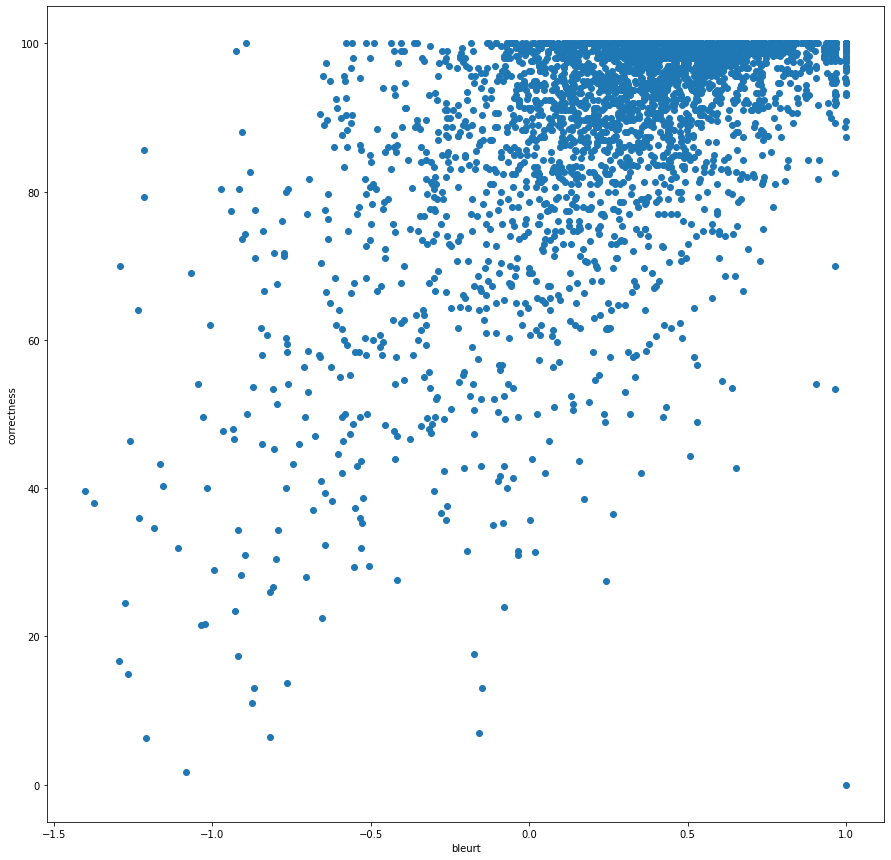

In [25]:
f = plt.figure(figsize=(15, 15))
ax = plt.axes()
ax.scatter(data["bleurt"], data["correctness"])
ax.set_xlabel("bleurt")
ax.set_ylabel("correctness")

Text(0, 0.5, 'correctness')

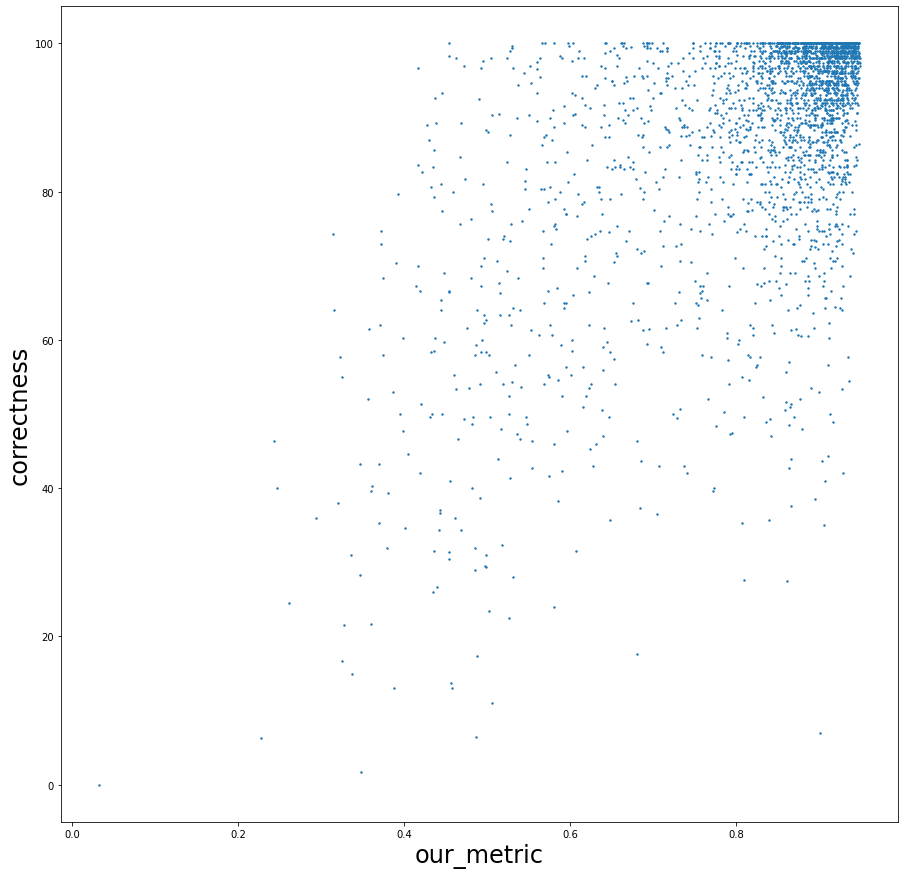

In [33]:
f = plt.figure(figsize=(15, 15))
ax = plt.axes()
ax.scatter(data["ensemble"], data["correctness"], s=2)
ax.set_xlabel("our_metric", fontsize=24)
ax.set_ylabel("correctness", fontsize=24)

Text(0.5, 0.98, 'Finetuned on 2017, evaluated on 2020')

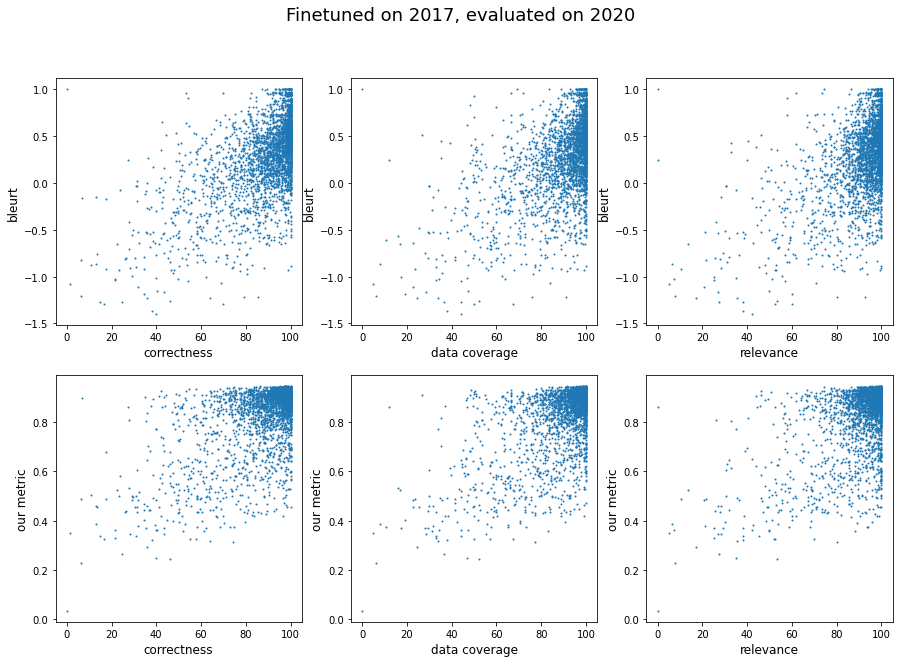

In [55]:
# f = plt.figure(figsize=(15, 15))
# ax = plt.axes()
# ax.scatter(data["ensemble"], data["correctness"])
# ax.set_xlabel("ensemble")
# ax.set_ylabel("correctness")

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
for i, metric in enumerate(["bleurt", "ensemble"]):
    for j, human in enumerate(["correctness", "data coverage", "relevance"]):
        axs[i, j].scatter(data[human], data[metric], s=1)
        axs[i, j].set_xlabel(human, fontsize=12)
        axs[i, j].set_ylabel("our metric" if metric == "ensemble" else metric, fontsize=12)
fig.suptitle("Finetuned on 2017, evaluated on 2020", fontsize=18)

In [ ]:
candidate_folders = list_subfolders_with_paths = [f.path for f in os.scandir("raw_data/en_submissions_rdf2text") if f.is_dir()]
human_scores = json.load(open("raw_data/english_humeval_data_all_teams.json"))
teams = set([item["submission_id"] for item in human_scores])
human_scores_per_team = {team: [] for team in teams}
for item in human_scores:
    human_scores_per_team[item["submission_id"]].append(item)

rdf_pool = [item for item in open(os.path.join("raw_data", "unwrapped_rdfs.txt")).readlines()[:1779]]
all_rdfs = []
all_hypotheses = []

for candidate_folder in tqdm(candidate_folders):
    team = candidate_folder.split("/")[-1]
    local_hypotheses = open(os.path.join(candidate_folder, "primary.en")).readlines()[:1779]

    for item in human_scores_per_team[team]:
        sample_id = int(item["sample_id"]) - 1
        # our score
        all_hypotheses.append(local_hypotheses[sample_id][:-1])
        all_rdfs.append(rdf_pool[sample_id][:-1])
        # automatic scores

In [ ]:
differences = np.array(data["finetuned_bi_all_bs160_allneg"]) - np.array(data["finetuned_cross_all_bs160_allneg"])

In [ ]:
len(data["finetuned_bi_all_bs160_allneg"])

In [ ]:
top_k = 10
cross_advantage = np.argpartition(differences, -top_k)[-top_k:]
bi_advantage = np.argpartition(differences, top_k)[:top_k]

In [ ]:
differences[cross_advantage]

In [ ]:
differences[bi_advantage]

In [ ]:
cross_advantage

In [12]:
for item in bi_advantage:
    print(all_hypotheses[item])
    print(all_rdfs[item])
    print(data["finetuned_bi_all_bs160_allneg"][item], data["finetuned_cross_all_bs160_allneg"][item], data["correctness"][item])
    print()

NameError: name 'bi_advantage' is not defined

In [13]:
for item in cross_advantage:
    print(all_hypotheses[item])
    print(all_rdfs[item])
    print(data["finetuned_bi_all_bs160_allneg"][item], data["finetuned_cross_all_bs160_allneg"][item], data["correctness"][item])
    print()

NameError: name 'cross_advantage' is not defined